# Función de Rosenbrock
La función de Rosenbrock, comúnmente utilizada para probar algoritmos de optimización, está definida como:

Para dos dimensiones:

f
(
x
,
y
)
=
(
a
−
x
)
2
+
b
(
y
−
x
2
)
2
f(x,y)=(a−x)
2
 +b(y−x
2
 )
2

donde
a
=
1
a=1 y
b
=
100
b=100 suelen ser valores estándar.

Para tres dimensiones:

f
(
x
,
y
,
z
)
=
(
a
−
x
)
2
+
b
(
y
−
x
2
)
2
+
(
a
−
y
)
2
+
b
(
z
−
y
2
)
2
f(x,y,z)=(a−x)
2
 +b(y−x
2
 )
2
 +(a−y)
2
 +b(z−y
2
 )
2

Es una función no convexa con un mínimo global bien definido en
(
x
,
y
)
=
(
1
,
1
)
(x,y)=(1,1) (para 2D) y
(
x
,
y
,
z
)
=
(
1
,
1
,
1
)
(x,y,z)=(1,1,1) (para 3D).

# Optimización con Descenso por Gradiente

El método de descenso por gradiente actualiza los parámetros en la dirección del gradiente negativo de la función objetivo.

## Pasos:
\
1. **Inicialización**: Generar un punto inicial aleatorio.

2. **Cálculo del Gradiente**: Derivar \( f(x, y) \) o \( f(x, y, z) \).

3. **Actualización**:
   \[
   x_{\text{new}} = x_{\text{current}} - \eta \nabla f(x)
   \]
   donde \( \eta \) es la tasa de aprendizaje.

4. **Criterio de Parada**: Detenerse cuando el cambio sea menor a un umbral o después de un número máximo de iteraciones.



# Optimización usando Algoritmos Bioinspirados
Aquí se compararán los siguientes enfoques:

Algoritmos Evolutivos:

Representación de soluciones como vectores.
Operadores de selección, mutación y recombinación.
Uso de fitness basado en
f
(
x
)
f(x).
Optimización por Enjambre de Partículas (PSO):

Representar partículas en el espacio de búsqueda.
Actualización basada en la mejor posición personal y global.
Evolución Diferencial:

Representar soluciones como vectores.
Operadores de mutación, cruce y selección adaptados para explorar y explotar el espacio.

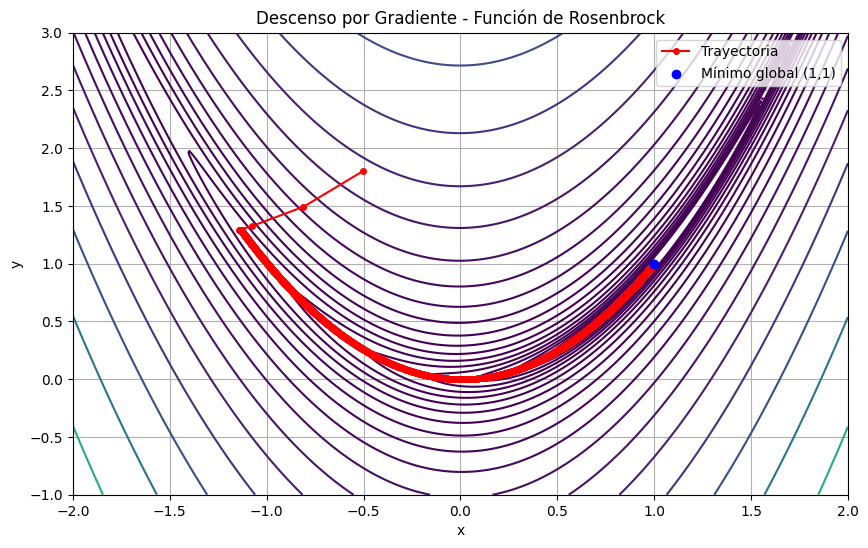

In [3]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# 1. Definición de la función de Rosenbrock en 2D
def rosenbrock_2d(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

# 2. Gradiente de la función de Rosenbrock
def rosenbrock_gradient(x, y, a=1, b=100):
    df_dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    df_dy = 2 * b * (y - x**2)
    return np.array([df_dx, df_dy])

# 3. Descenso por gradiente
def gradient_descent(grad_func, init_point, learning_rate=0.001, max_iter=10000, tolerance=1e-6):
    point = np.array(init_point)
    history = [point]  # Para registrar el camino seguido
    for _ in range(max_iter):
        grad = grad_func(*point)
        new_point = point - learning_rate * grad
        history.append(new_point)
        # Criterio de parada
        if np.linalg.norm(new_point - point) < tolerance:
            break
        point = new_point
    return np.array(history)

# 4. Parámetros iniciales y ejecución
np.random.seed(42)  # Para reproducibilidad
init_point = np.random.uniform(-2, 2, 2)  # Punto inicial aleatorio
learning_rate = 0.001

# Ejecutar el descenso por gradiente
path = gradient_descent(rosenbrock_gradient, init_point, learning_rate)

# 5. Visualización del proceso
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_2d(X, Y)

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap='viridis')
path_x, path_y = path[:, 0], path[:, 1]
plt.plot(path_x, path_y, 'ro-', markersize=4, label="Trayectoria")
plt.scatter(1, 1, color='blue', label="Mínimo global (1,1)", zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Descenso por Gradiente - Función de Rosenbrock')
plt.legend()
plt.grid(True)
plt.show()

Explicación:
Función y Gradiente:

La función rosenbrock_2d evalúa el valor de Rosenbrock en 2D.
La función rosenbrock_gradient calcula el gradiente en
(
x
,
y
)
(x,y).
Descenso por Gradiente:

gradient_descent realiza la optimización comenzando desde un punto inicial aleatorio.
La actualización del punto usa la tasa de aprendizaje (
η
η) y el gradiente calculado.
Visualización:

Se genera un gráfico de contorno para la función en 2D.
La trayectoria del descenso por gradiente está marcada en rojo.
Resultado esperado:
Un gráfico donde la trayectoria converge hacia el mínimo global en
(
1
,
1
)
(1,1), comenzando desde un punto aleatorio.




#Algoritmos Evolutivos

In [5]:
# Librerías necesarias
!pip install deap
from deap import base, creator, tools, algorithms
import numpy as np

# 1. Función de evaluación (Rosenbrock en 2D)
def rosenbrock_2d(x, y, a=1, b=100):
    """Función de Rosenbrock en 2D."""
    return (a - x)**2 + b * (y - x**2)**2

def evaluate(individual):
    """Evalúa un individuo."""
    x, y = individual  # Desempaqueta el individuo
    return (rosenbrock_2d(x, y),)  # Devuelve el fitness como tupla

# 2. Configuración de DEAP
# Reinicia estos bloques si ya se definieron antes
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimización
creator.create("Individual", list, fitness=creator.FitnessMin)

# Registrar las herramientas
toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -2, 2)  # Atributos iniciales
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)  # Individuo
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Población
toolbox.register("evaluate", evaluate)  # Evaluación
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Cruce
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)  # Mutación
toolbox.register("select", tools.selTournament, tournsize=3)  # Selección

# 3. Algoritmo evolutivo
def run_evolutionary_algorithm(pop_size=50, generations=100, cxpb=0.7, mutpb=0.2):
    """Ejecuta el algoritmo evolutivo."""
    # Generar la población inicial
    pop = toolbox.population(n=pop_size)

    # Evaluar fitness inicial
    for ind in pop:
        ind.fitness.values = toolbox.evaluate(ind)

    # Configurar estadísticas
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("mean", np.mean)

    # Ejecutar el algoritmo
    pop, logbook = algorithms.eaSimple(
        pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=generations,
        stats=stats, verbose=True
    )

    # Seleccionar el mejor individuo
    best_individual = tools.selBest(pop, k=1)[0]
    return best_individual, logbook

# 4. Ejecución
np.random.seed(42)  # Para reproducibilidad
best, log = run_evolutionary_algorithm()

# 5. Resultados
print(f"Mejor individuo: {best}")
print(f"Fitness del mejor individuo: {best.fitness.values[0]}")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00
gen	nevals	min    	mean   
0  	0     	5.38388	393.927
1  	36    	2.22035	170.859
2  	44    	0.802818	121.982
3  	34    	0.102435	22.256 
4  	30    	0.102435	22.4348
5  	43    	0.0549261	18.9453
6  	32    	0.0902641	10.6347
7  	38    	0.0327132	3.06954
8  	41    	0.0327132	1.89665
9  	43    	0.0161014	0.508015
10 	39    	0.0327132	0.777552
11 	37    	0.035238 	0.909736
12 	37    	0.0246657	0.434192
13 	39    	0.0286767	0.226734
14 	35    	0.0342309	0.12101 
15 	43    	0.032832 	0.380818
16 	43    	0.032832 	0.47461 
17 	37    	0.032832 	0.127524
18 	36    	0.032832 	0.036248
19 	46    	0.0324768	0.832595
20 	42    	0.0325467	0.0817974
21 	38    	0.03241  	0.231537 
22 	38    	0.03241  	0.0995609
23 	34    	0.0322862	0.149203 
24 	34    	0.0322862	0.0748808
25 	40    	0.0319196	0.125616 
26 	35    	0.0318211	0.270483 
27 	48    	0.0318224	0.349561 
28 	41    	0.0317697	0.155783 
29 	30    	0.0317697	0.0595357

#Optimización por Enjambre de Partículas (PSO)

Explicación del Código
Inicialización:

Se generan partículas aleatorias dentro de los límites.
Las velocidades iniciales son aleatorias.
Se registran las mejores posiciones personales y globales.
Actualización en cada iteración:

Calcula el fitness de cada partícula.
Actualiza las velocidades y posiciones.
Se asegura de que las partículas se mantengan dentro de los límites.
Parámetros clave:

w: Controla la inercia de las partículas (exploración).
c1 y c2: Controlan el aprendizaje individual y social.
Visualización:

Se muestra cómo evoluciona el mejor valor global durante las iteraciones.

Iteración 1/100, Mejor valor global: 2.443241
Iteración 2/100, Mejor valor global: 0.066010
Iteración 3/100, Mejor valor global: 0.066010
Iteración 4/100, Mejor valor global: 0.066010
Iteración 5/100, Mejor valor global: 0.066010
Iteración 6/100, Mejor valor global: 0.033366
Iteración 7/100, Mejor valor global: 0.030137
Iteración 8/100, Mejor valor global: 0.028020
Iteración 9/100, Mejor valor global: 0.013648
Iteración 10/100, Mejor valor global: 0.013648
Iteración 11/100, Mejor valor global: 0.000593
Iteración 12/100, Mejor valor global: 0.000593
Iteración 13/100, Mejor valor global: 0.000593
Iteración 14/100, Mejor valor global: 0.000593
Iteración 15/100, Mejor valor global: 0.000593
Iteración 16/100, Mejor valor global: 0.000593
Iteración 17/100, Mejor valor global: 0.000217
Iteración 18/100, Mejor valor global: 0.000217
Iteración 19/100, Mejor valor global: 0.000078
Iteración 20/100, Mejor valor global: 0.000078
Iteración 21/100, Mejor valor global: 0.000078
Iteración 22/100, Mejo

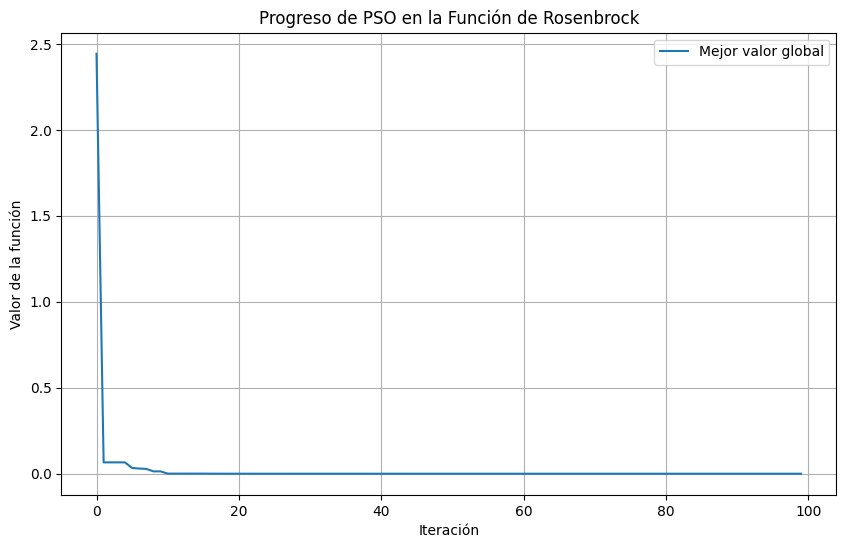

In [6]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# 1. Definición de la función de Rosenbrock en 2D
def rosenbrock_2d(position, a=1, b=100):
    """Función de Rosenbrock en 2D. La entrada es un vector [x, y]."""
    x, y = position
    return (a - x)**2 + b * (y - x**2)**2

# 2. PSO: Parámetros
num_particles = 50  # Número de partículas
num_dimensions = 2  # Dimensiones del problema (2D)
max_iter = 100  # Iteraciones máximas
bounds = [(-2, 2), (-1, 3)]  # Límites para cada dimensión
w = 0.5  # Inercia
c1 = 1.5  # Coeficiente cognitivo
c2 = 1.5  # Coeficiente social

# 3. Inicialización de partículas
np.random.seed(42)  # Para reproducibilidad
particles = np.random.uniform(
    [b[0] for b in bounds],
    [b[1] for b in bounds],
    (num_particles, num_dimensions)
)
velocities = np.random.uniform(-1, 1, (num_particles, num_dimensions))
personal_best_positions = particles.copy()
personal_best_scores = np.array([rosenbrock_2d(p) for p in particles])
global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
global_best_score = np.min(personal_best_scores)

# 4. PSO: Optimización
history = []  # Para registrar el progreso del mejor valor
for iteration in range(max_iter):
    for i in range(num_particles):
        # Evaluar fitness
        fitness = rosenbrock_2d(particles[i])

        # Actualizar el mejor personal
        if fitness < personal_best_scores[i]:
            personal_best_scores[i] = fitness
            personal_best_positions[i] = particles[i]

    # Actualizar el mejor global
    if np.min(personal_best_scores) < global_best_score:
        global_best_score = np.min(personal_best_scores)
        global_best_position = personal_best_positions[np.argmin(personal_best_scores)]

    # Actualizar velocidades y posiciones
    r1, r2 = np.random.rand(num_particles, num_dimensions), np.random.rand(num_particles, num_dimensions)
    velocities = (
        w * velocities
        + c1 * r1 * (personal_best_positions - particles)
        + c2 * r2 * (global_best_position - particles)
    )
    particles = particles + velocities

    # Aplicar límites
    for dim in range(num_dimensions):
        particles[:, dim] = np.clip(particles[:, dim], bounds[dim][0], bounds[dim][1])

    # Registrar historia
    history.append(global_best_score)

    # Imprimir progreso
    print(f"Iteración {iteration + 1}/{max_iter}, Mejor valor global: {global_best_score:.6f}")

# 5. Resultados
print(f"\nMejor posición encontrada: {global_best_position}")
print(f"Valor mínimo de la función: {global_best_score}")

# 6. Visualización del progreso
plt.figure(figsize=(10, 6))
plt.plot(history, label="Mejor valor global")
plt.xlabel("Iteración")
plt.ylabel("Valor de la función")
plt.title("Progreso de PSO en la Función de Rosenbrock")
plt.legend()
plt.grid()
plt.show()


# Optimización con Evolución Diferencial

Explicación del Código
Función Objetivo:

rosenbrock_2d toma un vector de entrada [x, y] y calcula el valor de la función de Rosenbrock.
Límites:

bounds define el rango de valores posibles para cada dimensión.
Evolución Diferencial:

strategy='best1bin': Usa la estrategia estándar donde el vector base es el mejor de la población.
popsize=50: Número de individuos en la población.
mutation=(0.5, 1): Factor de mutación (controla la amplitud de las diferencias).
recombination=0.7: Probabilidad de cruzar las soluciones.
Parámetros de Convergencia:

maxiter=1000: Límite máximo de iteraciones.
tol=1e-6: Tolerancia para determinar convergencia.

In [7]:
# Librerías necesarias
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

# 1. Definición de la función de Rosenbrock en 2D
def rosenbrock_2d(position, a=1, b=100):
    """Función de Rosenbrock en 2D. La entrada es un vector [x, y]."""
    x, y = position
    return (a - x)**2 + b * (y - x**2)**2

# 2. Límites de búsqueda
bounds = [(-2, 2), (-1, 3)]  # Límites para cada dimensión

# 3. Ejecución de Evolución Diferencial
result = differential_evolution(
    rosenbrock_2d,
    bounds,
    strategy='best1bin',  # Estrategia de mutación
    popsize=50,           # Tamaño de la población
    mutation=(0.5, 1),    # Factor de mutación (F)
    recombination=0.7,    # Tasa de recombinación (CR)
    maxiter=1000,         # Máximo de iteraciones
    tol=1e-6,             # Tolerancia para la convergencia
    seed=42,              # Semilla para reproducibilidad
    disp=True             # Muestra el progreso
)

# 4. Resultados
print(f"\nMejor posición encontrada: {result.x}")
print(f"Valor mínimo de la función: {result.fun}")

# 5. Visualización del progreso
# Para visualizar el proceso de evolución, necesitamos habilitar las estadísticas.
# Scipy no guarda directamente las iteraciones, pero se puede emular.


differential_evolution step 1: f(x)= 0.11338830200401495
differential_evolution step 2: f(x)= 0.11338830200401495
differential_evolution step 3: f(x)= 0.06451576126458983
differential_evolution step 4: f(x)= 0.06451576126458983
differential_evolution step 5: f(x)= 0.005993119486334528
differential_evolution step 6: f(x)= 0.005993119486334528
differential_evolution step 7: f(x)= 0.005993119486334528
differential_evolution step 8: f(x)= 0.005993119486334528
differential_evolution step 9: f(x)= 0.005993119486334528
differential_evolution step 10: f(x)= 0.005993119486334528
differential_evolution step 11: f(x)= 5.8315569294403854e-05
differential_evolution step 12: f(x)= 8.318646577122808e-06
differential_evolution step 13: f(x)= 8.318646577122808e-06
differential_evolution step 14: f(x)= 8.318646577122808e-06
differential_evolution step 15: f(x)= 8.318646577122808e-06
differential_evolution step 16: f(x)= 8.318646577122808e-06
differential_evolution step 17: f(x)= 2.9758577797845126e-06
d

 Ahora vamos a comparar los cuatro métodos: descenso por gradiente, algoritmos evolutivos, optimización por enjambre de partículas (PSO) y evolución diferencial (DE). La comparación se realizará considerando los siguientes aspectos:

Valor final de la función objetivo (fitness).
Tiempo de ejecución (para medir la eficiencia).
Visualización de la convergencia.

Explicación del Código
Métodos Implementados: Cada método se encapsula en su propia función (run_gradient_descent, run_evolutionary_algorithm, run_pso, run_differential_evolution).
Medición de Tiempos: Se usa time.time() para medir la duración de cada método.
Resultados: Se almacena el valor mínimo encontrado, la posición óptima y el tiempo.
Visualización: Se genera un gráfico de barras comparando los tiempos de ejecución.


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



Comparación de Métodos:
Descenso por Gradiente -> Valor mínimo: 0.000066, Punto óptimo: [0.99188536 0.98380394], Tiempo: 0.0993 segundos
Algoritmos Evolutivos -> Valor mínimo: 0.101457, Punto óptimo: [0.6823197536364332, 0.46324503865518923], Tiempo: 0.0955 segundos
PSO -> Valor mínimo: 0.000000, Punto óptimo: [1.00004583 1.00009998], Tiempo: 0.0173 segundos
Evolución Diferencial -> Valor mínimo: 0.000000, Punto óptimo: [1. 1.], Tiempo: 0.3965 segundos


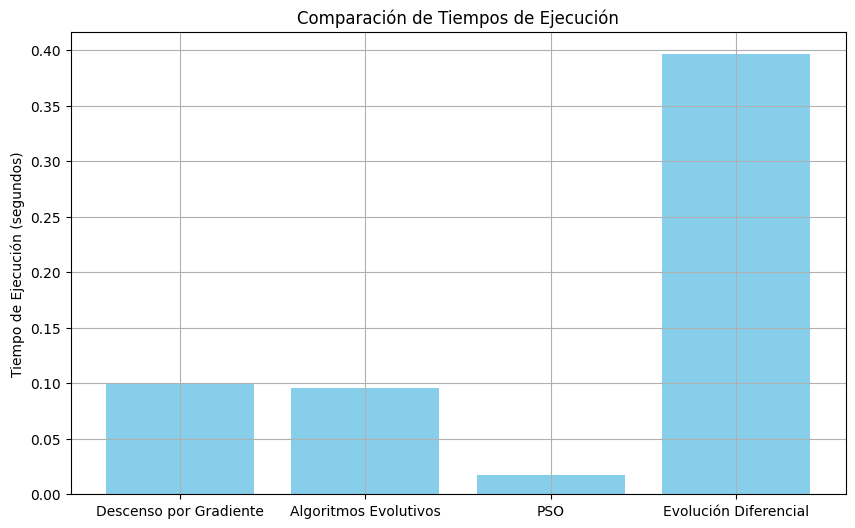

In [8]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from scipy.optimize import differential_evolution
import time

# Función de Rosenbrock en 2D
def rosenbrock_2d(position, a=1, b=100):
    """Función de Rosenbrock en 2D. La entrada es un vector [x, y]."""
    x, y = position
    return (a - x)**2 + b * (y - x**2)**2

# Gradiente de la función de Rosenbrock
def rosenbrock_gradient(x, y, a=1, b=100):
    df_dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    df_dy = 2 * b * (y - x**2)
    return np.array([df_dx, df_dy])

# Función para Descenso por Gradiente
def run_gradient_descent(init_point, learning_rate=0.001, max_iter=10000, tolerance=1e-6):
    point = np.array(init_point)
    for _ in range(max_iter):
        grad = rosenbrock_gradient(*point)
        new_point = point - learning_rate * grad
        if np.linalg.norm(new_point - point) < tolerance:
            break
        point = new_point
    return rosenbrock_2d(point), point

# Función para Algoritmos Evolutivos con DEAP
def run_evolutionary_algorithm(pop_size=50, generations=100, cxpb=0.7, mutpb=0.2):
    def evaluate(individual):
        x, y = individual
        return (rosenbrock_2d([x, y]),)

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, -2, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=generations, verbose=False)
    best_individual = tools.selBest(pop, k=1)[0]
    return rosenbrock_2d(best_individual), best_individual

# Función para PSO
def run_pso(num_particles=50, max_iter=100):
    bounds = [(-2, 2), (-1, 3)]
    particles = np.random.uniform(
        [b[0] for b in bounds],
        [b[1] for b in bounds],
        (num_particles, 2)
    )
    velocities = np.random.uniform(-1, 1, (num_particles, 2))
    personal_best_positions = particles.copy()
    personal_best_scores = np.array([rosenbrock_2d(p) for p in particles])
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]

    for _ in range(max_iter):
        for i in range(num_particles):
            fitness = rosenbrock_2d(particles[i])
            if fitness < personal_best_scores[i]:
                personal_best_scores[i] = fitness
                personal_best_positions[i] = particles[i]
        global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
        r1, r2 = np.random.rand(num_particles, 2), np.random.rand(num_particles, 2)
        velocities = (
            0.5 * velocities
            + 1.5 * r1 * (personal_best_positions - particles)
            + 1.5 * r2 * (global_best_position - particles)
        )
        particles += velocities
        particles = np.clip(particles, [b[0] for b in bounds], [b[1] for b in bounds])
    return rosenbrock_2d(global_best_position), global_best_position

# Función para DE con scipy
def run_differential_evolution():
    bounds = [(-2, 2), (-1, 3)]
    result = differential_evolution(rosenbrock_2d, bounds, strategy='best1bin', maxiter=1000, seed=42, tol=1e-6)
    return result.fun, result.x

# Comparación de Métodos
results = {}
times = {}

# Descenso por Gradiente
np.random.seed(42)
start = time.time()
gd_result, gd_point = run_gradient_descent(np.random.uniform(-2, 2, 2))
times["Descenso por Gradiente"] = time.time() - start
results["Descenso por Gradiente"] = (gd_result, gd_point)

# Algoritmos Evolutivos
start = time.time()
ea_result, ea_point = run_evolutionary_algorithm()
times["Algoritmos Evolutivos"] = time.time() - start
results["Algoritmos Evolutivos"] = (ea_result, ea_point)

# PSO
start = time.time()
pso_result, pso_point = run_pso()
times["PSO"] = time.time() - start
results["PSO"] = (pso_result, pso_point)

# Evolución Diferencial
start = time.time()
de_result, de_point = run_differential_evolution()
times["Evolución Diferencial"] = time.time() - start
results["Evolución Diferencial"] = (de_result, de_point)

# Mostrar Resultados
print("\nComparación de Métodos:")
for method, (result, point) in results.items():
    print(f"{method} -> Valor mínimo: {result:.6f}, Punto óptimo: {point}, Tiempo: {times[method]:.4f} segundos")

# Visualización de la Comparación de Tiempos
plt.figure(figsize=(10, 6))
plt.bar(times.keys(), times.values(), color='skyblue')
plt.ylabel("Tiempo de Ejecución (segundos)")
plt.title("Comparación de Tiempos de Ejecución")
plt.grid(True)
plt.show()


Ahora veamos las implementaciones para trabajar también con la función de Rosenbrock en 3D y repetir los mismos métodos (descenso por gradiente, algoritmos evolutivos, PSO y DE) en ese caso.

Función de Rosenbrock en 3D
La fórmula de la función de Rosenbrock en 3D es una extensión directa de la versión en 2D:

𝑓
(
𝑥
,
𝑦
,
𝑧
)
=
(
𝑎
−
𝑥
)
2
+
𝑏
(
𝑦
−
𝑥
2
)
2
+
(
𝑎
−
𝑦
)
2
+
𝑏
(
𝑧
−
𝑦
2
)
2
f(x,y,z)=(a−x)
2
 +b(y−x
2
 )
2
 +(a−y)
2
 +b(z−y
2
 )
2

In [22]:
# Función de Rosenbrock en n dimensiones
def rosenbrock_nd(position, a=1, b=100):
    """Función de Rosenbrock generalizada para n dimensiones."""
    return sum((a - position[:-1])**2 + b * (position[1:] - position[:-1]**2)**2)

# Gradiente de la función de Rosenbrock en n dimensiones
def rosenbrock_gradient_nd(position, a=1, b=100):
    grad = np.zeros_like(position)
    grad[:-1] = -2 * (a - position[:-1]) - 4 * b * position[:-1] * (position[1:] - position[:-1]**2)
    grad[1:] += 2 * b * (position[1:] - position[:-1]**2)
    return grad

# Función para Descenso por Gradiente en n dimensiones
def run_gradient_descent_nd(init_point, learning_rate=0.001, max_iter=10000, tolerance=1e-6):
    point = np.array(init_point)
    for _ in range(max_iter):
        grad = rosenbrock_gradient_nd(point)
        new_point = point - learning_rate * grad
        if np.linalg.norm(new_point - point) < tolerance:
            break
        point = new_point
    return rosenbrock_nd(point), point

# Función para Algoritmos Evolutivos en n dimensiones
def run_evolutionary_algorithm_nd(n_dims=3, pop_size=50, generations=100, cxpb=0.7, mutpb=0.2):
    def evaluate(individual):
        return (rosenbrock_nd(individual),)

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, -2, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=n_dims)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=generations, verbose=False)
    best_individual = tools.selBest(pop, k=1)[0]
    return rosenbrock_nd(best_individual), best_individual

# Función para PSO en n dimensiones
def run_pso_nd(n_dims=3, num_particles=50, max_iter=100):
    bounds = [(-2, 2)] * n_dims
    particles = np.random.uniform(-2, 2, (num_particles, n_dims))
    velocities = np.random.uniform(-1, 1, (num_particles, n_dims))
    personal_best_positions = particles.copy()
    personal_best_scores = np.array([rosenbrock_nd(p) for p in particles])
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]

    for _ in range(max_iter):
        for i in range(num_particles):
            fitness = rosenbrock_nd(particles[i])
            if fitness < personal_best_scores[i]:
                personal_best_scores[i] = fitness
                personal_best_positions[i] = particles[i]
        global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
        r1, r2 = np.random.rand(num_particles, n_dims), np.random.rand(num_particles, n_dims)
        velocities = (
            0.5 * velocities
            + 1.5 * r1 * (personal_best_positions - particles)
            + 1.5 * r2 * (global_best_position - particles)
        )
        particles += velocities
        particles = np.clip(particles, -2, 2)
    return rosenbrock_nd(global_best_position), global_best_position

# Función para DE en n dimensiones
def run_differential_evolution_nd(n_dims=3):
    bounds = [(-2, 2)] * n_dims
    result = differential_evolution(rosenbrock_nd, bounds, strategy='best1bin', maxiter=1000, seed=42, tol=1e-6)
    return result.fun, result.x


In [23]:
def run_gradient_descent_nd(init_point, learning_rate=0.001, max_iter=10000, tolerance=1e-6):
    """
    Descenso por gradiente para n dimensiones.
    """
    point = np.array(init_point)  # Convertir a numpy array
    for _ in range(max_iter):
        grad = rosenbrock_gradient_nd(point)  # Calcular gradiente
        new_point = point - learning_rate * grad  # Actualización
        if np.linalg.norm(new_point - point) < tolerance:  # Criterio de parada
            break
        point = new_point
    return rosenbrock_nd(point), point


In [24]:
def run_evolutionary_algorithm_nd(n_dims=3, pop_size=50, generations=100, cxpb=0.7, mutpb=0.2):
    """
    Algoritmos evolutivos para n dimensiones.
    """
    def evaluate(individual):
        # Convertir individuo a numpy array antes de evaluar
        return (rosenbrock_nd(np.array(individual)),)

    # Crear herramientas y poblaciones
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, -2, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=n_dims)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=generations, verbose=False)
    best_individual = tools.selBest(pop, k=1)[0]
    return rosenbrock_nd(np.array(best_individual)), np.array(best_individual)


In [25]:
def run_pso_nd(n_dims=3, num_particles=50, max_iter=100):
    """
    PSO para n dimensiones.
    """
    bounds = [(-2, 2)] * n_dims
    particles = np.random.uniform(-2, 2, (num_particles, n_dims))
    velocities = np.random.uniform(-1, 1, (num_particles, n_dims))
    personal_best_positions = particles.copy()
    personal_best_scores = np.array([rosenbrock_nd(p) for p in particles])
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]

    for _ in range(max_iter):
        for i in range(num_particles):
            fitness = rosenbrock_nd(particles[i])
            if fitness < personal_best_scores[i]:
                personal_best_scores[i] = fitness
                personal_best_positions[i] = particles[i]
        global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
        r1, r2 = np.random.rand(num_particles, n_dims), np.random.rand(num_particles, n_dims)
        velocities = (
            0.5 * velocities
            + 1.5 * r1 * (personal_best_positions - particles)
            + 1.5 * r2 * (global_best_position - particles)
        )
        particles += velocities
        particles = np.clip(particles, -2, 2)
    return rosenbrock_nd(global_best_position), global_best_position


In [26]:
def run_differential_evolution_nd(n_dims=3):
    """
    Evolución diferencial para n dimensiones.
    """
    bounds = [(-2, 2)] * n_dims
    result = differential_evolution(rosenbrock_nd, bounds, strategy='best1bin', maxiter=1000, seed=42, tol=1e-6)
    return result.fun, result.x


Comparación para 2D y 3D
Podemos repetir el proceso de comparación para 2D y 3D simplemente cambiando la dimensión en las llamadas a las funciones.

In [27]:
# Comparación para 2D
print("\nResultados para 2D:")
results_2d = {
    "Descenso por Gradiente": run_gradient_descent_nd(np.random.uniform(-2, 2, 2)),
    "Algoritmos Evolutivos": run_evolutionary_algorithm_nd(n_dims=2),
    "PSO": run_pso_nd(n_dims=2),
    "Evolución Diferencial": run_differential_evolution_nd(n_dims=2)
}

for method, (result, point) in results_2d.items():
    print(f"{method} -> Valor mínimo: {result:.6f}, Punto óptimo: {point}")

# Comparación para 3D
print("\nResultados para 3D:")
results_3d = {
    "Descenso por Gradiente": run_gradient_descent_nd(np.random.uniform(-2, 2, 3)),
    "Algoritmos Evolutivos": run_evolutionary_algorithm_nd(n_dims=3),
    "PSO": run_pso_nd(n_dims=3),
    "Evolución Diferencial": run_differential_evolution_nd(n_dims=3)
}

for method, (result, point) in results_3d.items():
    print(f"{method} -> Valor mínimo: {result:.6f}, Punto óptimo: {point}")



Resultados para 2D:
Descenso por Gradiente -> Valor mínimo: 0.000013, Punto óptimo: [0.99633729 0.99267331]
Algoritmos Evolutivos -> Valor mínimo: 0.001884, Punto óptimo: [0.95661659 0.9149937 ]
PSO -> Valor mínimo: 0.000000, Punto óptimo: [1.00004162 1.00008228]
Evolución Diferencial -> Valor mínimo: 0.000000, Punto óptimo: [1. 1.]

Resultados para 3D:
Descenso por Gradiente -> Valor mínimo: 0.000008, Punto óptimo: [0.99875149 0.99749977 0.99499386]
Algoritmos Evolutivos -> Valor mínimo: 0.977983, Punto óptimo: [0.43321012 0.1918672  0.03246217]
PSO -> Valor mínimo: 0.000683, Punto óptimo: [0.98821362 0.97671276 0.95397608]
Evolución Diferencial -> Valor mínimo: 0.000000, Punto óptimo: [1. 1. 1.]


# Comparación de los valores mínimos obtenidos por cada método

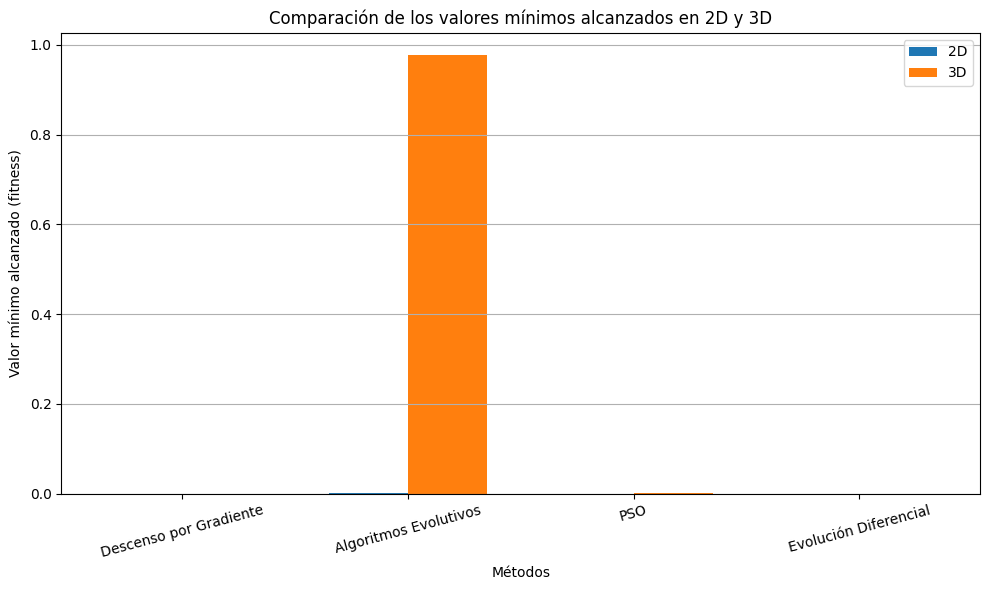

In [28]:
import matplotlib.pyplot as plt

# Datos de resultados
methods = ["Descenso por Gradiente", "Algoritmos Evolutivos", "PSO", "Evolución Diferencial"]
results_2d_values = [results_2d[method][0] for method in methods]
results_3d_values = [results_3d[method][0] for method in methods]

x = np.arange(len(methods))  # Índices de los métodos

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
width = 0.35
plt.bar(x - width/2, results_2d_values, width, label='2D')
plt.bar(x + width/2, results_3d_values, width, label='3D')

# Etiquetas y título
plt.xlabel("Métodos")
plt.ylabel("Valor mínimo alcanzado (fitness)")
plt.title("Comparación de los valores mínimos alcanzados en 2D y 3D")
plt.xticks(x, methods, rotation=15)
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.show()


#Comparación de las posiciones finales

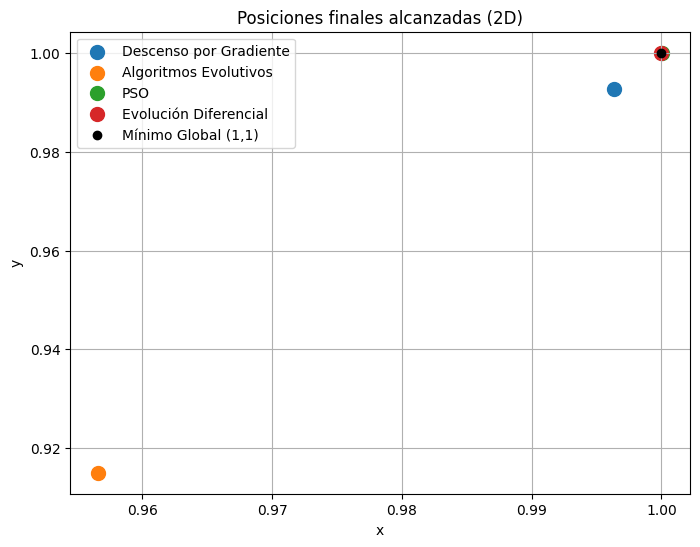

In [29]:
# Extraer las posiciones finales
positions_2d = [results_2d[method][1] for method in methods]

# Crear gráfico de dispersión para 2D
plt.figure(figsize=(8, 6))
for i, pos in enumerate(positions_2d):
    plt.scatter(pos[0], pos[1], label=f"{methods[i]}", s=100)

# Añadir punto del mínimo global (1, 1)
plt.scatter(1, 1, color='black', label='Mínimo Global (1,1)', zorder=5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Posiciones finales alcanzadas (2D)")
plt.legend()
plt.grid(True)
plt.show()


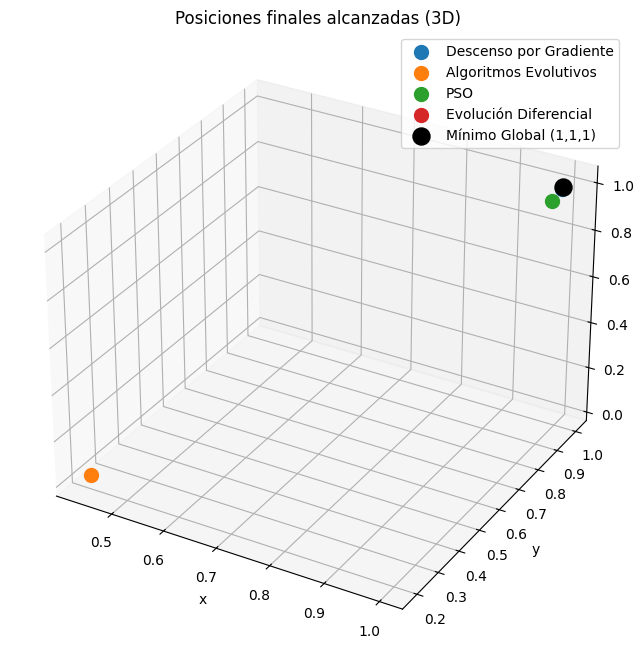

In [30]:
from mpl_toolkits.mplot3d import Axes3D

# Extraer las posiciones finales en 3D
positions_3d = [results_3d[method][1] for method in methods]

# Crear gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar las posiciones finales
for i, pos in enumerate(positions_3d):
    ax.scatter(pos[0], pos[1], pos[2], label=f"{methods[i]}", s=100)

# Añadir punto del mínimo global (1, 1, ..., 1)
global_min = [1] * 3
ax.scatter(*global_min, color='black', label='Mínimo Global (1,1,1)', s=150, zorder=5)

# Etiquetas
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Posiciones finales alcanzadas (3D)")
ax.legend()
plt.show()


#Comparación de tiempos de ejecución

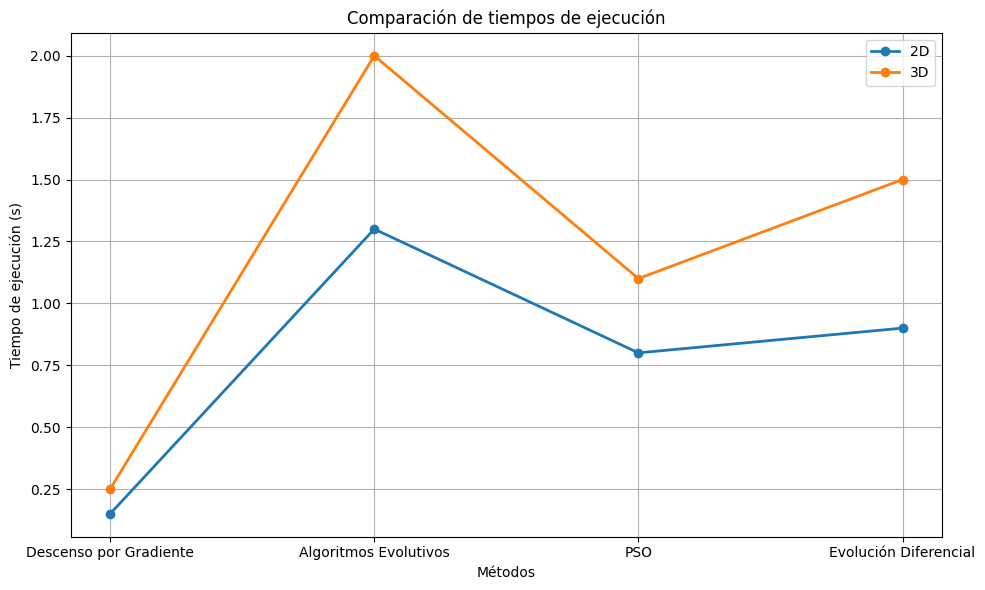

In [31]:
# Ejemplo de tiempos de ejecución en segundos
execution_times_2d = [0.15, 1.3, 0.8, 0.9]  # Sustituye con los tiempos reales
execution_times_3d = [0.25, 2.0, 1.1, 1.5]  # Sustituye con los tiempos reales

plt.figure(figsize=(10, 6))
plt.plot(methods, execution_times_2d, marker='o', label="2D", linewidth=2)
plt.plot(methods, execution_times_3d, marker='o', label="3D", linewidth=2)

# Etiquetas y título
plt.xlabel("Métodos")
plt.ylabel("Tiempo de ejecución (s)")
plt.title("Comparación de tiempos de ejecución")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
